# Project Title
## Exploratory Data Analysis on AmbitionBox Company Insights Dataset
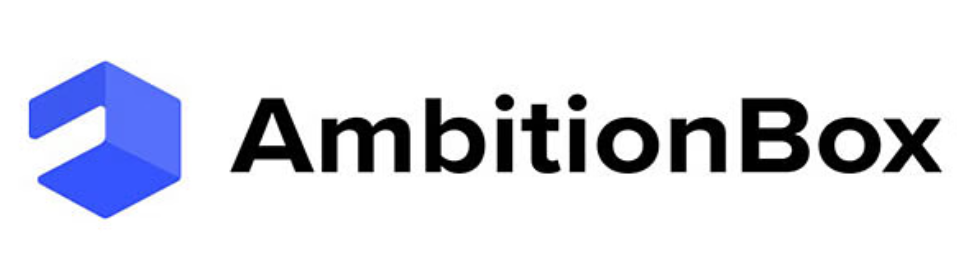

# Problem Statement
### The goal of this project is to perform comprehensive exploratory data analysis (EDA) on the AmbitionBox dataset, which includes employee reviews, salary data, job roles, company ratings, and other company-specific insights

## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re

# Web Scraping

In [5]:
url = 'https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget'
page=requests.get(url)
page

<Response [403]>

In [6]:
url = "https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)',
    'Referer': 'https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget'}
page = requests.get(url, headers=headers)
page

<Response [200]>

In [58]:
#page.text

In [8]:
soup = BeautifulSoup(page.text)

In [9]:
soup.find_all('h1')[0].text

'\n\t\t\t\t\t\t\tCompanies in India\n\t\t\t\t\t\t'

In [10]:
List_company=soup.find_all('div',class_='companyCardWrapper')

In [11]:
len(List_company)

20

In [12]:
Company_names=[]

for i in soup.find_all('h2',class_ = 'companyCardWrapper__companyName'):
  Company_names.append(i.text.strip())

In [13]:
Company_names

['TCS',
 'Accenture',
 'Wipro',
 'Cognizant',
 'Capgemini',
 'HDFC Bank',
 'Infosys',
 'ICICI Bank',
 'HCLTech',
 'Tech Mahindra',
 'Genpact',
 'Teleperformance',
 'Concentrix Corporation',
 'Axis Bank',
 'Amazon',
 'Jio',
 'iEnergizer',
 'Reliance Retail',
 'IBM',
 'LTIMindtree']

In [56]:
for i in range(1,100):   #multi page idea
    url= f'page{i}'
    

In [15]:
base_url = 'https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Referer': 'https://www.ambitionbox.com/'
}


company_names = []
ratings = []
reviews_count = []
salary_count = []
interview_count = []
jobs_count = []
locations = []



for page_num in range(1,100):
    url = f"{base_url}&page={page_num}"
    print(f"Scraping page: {page_num}")

    try:
        #response = requests.get(url, headers=headers)
        #response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)

        soup = BeautifulSoup(page.text, 'html.parser')

        company_cards = soup.find_all('div', class_='companyCardWrapper')

        if not company_cards:
            print(f"No more company cards found on page {page_num}. Exiting loop.")
            break

        for card in company_cards:
            name_tag = card.find('h2', class_='companyCardWrapper__companyName')
            company_names.append(name_tag.text.strip() if name_tag else 'N/A')

            rating_tag = card.find('div', class_='rating_star_container')
            if rating_tag:
                try:
                    ratings.append(float(rating_tag.text.strip()))
                except ValueError:
                    ratings.append('N/A')
            else:
                ratings.append('N/A')

            reviews_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Reviews')
            reviews_count.append(reviews_tag.find_previous_sibling('span').text.strip() if reviews_tag and reviews_tag.find_previous_sibling('span') else 'N/A')

            salaries_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Salaries')
            salary_count.append(salaries_tag.find_previous_sibling('span').text.strip() if salaries_tag and salaries_tag.find_previous_sibling('span') else 'N/A')

            interviews_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Interviews')
            interview_count.append(interviews_tag.find_previous_sibling('span').text.strip() if interviews_tag and interviews_tag.find_previous_sibling('span') else 'N/A')

            jobs_tag = card.find('span', class_='companyCardWrapper__ActionTitle', string='Jobs')
            jobs_count.append(jobs_tag.find_previous_sibling('span').text.strip() if jobs_tag and jobs_tag.find_previous_sibling('span') else 'N/A')

            location_tag = card.find('span', class_='companyCardWrapper__interLinking')
            locations.append(location_tag.text.strip() if location_tag else 'N/A')


    except requests.exceptions.HTTPError as e:
        print(f"HTTP Error on page {page_num}: {e}")
        print("Stopping scraping due to HTTP error.")
        break
    except requests.exceptions.RequestException as e:
        print(f"Request Error on page {page_num}: {e}")
        print("Stopping scraping due to network/request error.")
        break
    except Exception as e:
        print(f"An unexpected error occurred on page {page_num}: {e}")
        print("Stopping scraping due to an unexpected error.")
        break


Scraping page: 1
Scraping page: 2
Scraping page: 3
Scraping page: 4
Scraping page: 5
Scraping page: 6
Scraping page: 7
Scraping page: 8
Scraping page: 9
Scraping page: 10
Scraping page: 11
Scraping page: 12
Scraping page: 13
Scraping page: 14
Scraping page: 15
Scraping page: 16
Scraping page: 17
Scraping page: 18
Scraping page: 19
Scraping page: 20
Scraping page: 21
Scraping page: 22
Scraping page: 23
Scraping page: 24
Scraping page: 25
Scraping page: 26
Scraping page: 27
Scraping page: 28
Scraping page: 29
Scraping page: 30
Scraping page: 31
Scraping page: 32
Scraping page: 33
Scraping page: 34
Scraping page: 35
Scraping page: 36
Scraping page: 37
Scraping page: 38
Scraping page: 39
Scraping page: 40
Scraping page: 41
Scraping page: 42
Scraping page: 43
Scraping page: 44
Scraping page: 45
Scraping page: 46
Scraping page: 47
Scraping page: 48
Scraping page: 49
Scraping page: 50
Scraping page: 51
Scraping page: 52
Scraping page: 53
Scraping page: 54
Scraping page: 55
Scraping page: 56
S

In [16]:
data={
    'Company Name': company_names,
    'Rating': ratings,
    'Reviews': reviews_count,
    'Salaries': salary_count,
    'Interviews': interview_count,
    'Jobs': jobs_count,
    'Location': locations,
}

In [57]:
#data

In [18]:
df = pd.DataFrame(data)
df

,Company Name,Rating,Reviews,Salaries,Interviews,Jobs,Location
0,TCS,3.6,98.7k,9.2L,11.1k,244,IT Services & Consulting | Bangalore / Bengalu...
1,Accenture,3.7,63.7k,6.1L,8.7k,12.4k,IT Services & Consulting | Bangalore / Bengalu...
2,Wipro,3.7,57.5k,4.6L,6.1k,4.9k,IT Services & Consulting | Bangalore / Bengalu...
3,Cognizant,3.7,54.7k,5.9L,5.9k,428,IT Services & Consulting | Hyderabad / Secunde...
4,Capgemini,3.7,46.3k,4.6L,5.1k,1.7k,IT Services & Consulting | Bangalore / Bengalu...
...,...,...,...,...,...,...,...
1975,Jio,4.1,25.8k,61.3k,2.2k,170,Telecom | Mumbai +1484 other locations
1976,iEnergizer,4.7,24.9k,22.9k,784,91,BPO | Noida +45 other locations
1977,Reliance Retail,3.9,24.2k,67.2k,1.7k,113,Retail | Mumbai +1100 other locations
1978,IBM,4.0,23.6k,2.1L,2.5k,2.4k,IT Services & Consulting | Bangalore / Bengalu...


In [19]:
data = df
data['Industry'] = data['Location'].apply(lambda x: x.split(' | ')[0] if ' | ' in x else None)

def extract_primary_city(location_str):
    if ' | ' in location_str:
        parts = location_str.split(' | ')[1]
        city = re.sub(r'\s*\+\d+\s*other locations', '', parts)
        city = city.replace(' / Bengaluru', '').strip()
        return city
    return None

data['Primary_City'] = data['Location'].apply(extract_primary_city)

def extract_num_other_locations(location_str):
    match = re.search(r'\+(\d+)\s*other locations', location_str)
    if match:
        return int(match.group(1))
    return 0

data['Num_Other_Locations'] = data['Location'].apply(extract_num_other_locations)
data['Primary_City'] = data['Primary_City'].replace({'Bangalore': 'Bengaluru', 'Noida': 'Noida'})
data['Industry'].fillna('Unknown', inplace=True)

data.drop('Location', axis=1, inplace=True)

print(data[['Industry', 'Primary_City', 'Num_Other_Locations']].head())
     

                   Industry              Primary_City  Num_Other_Locations
0  IT Services & Consulting                 Bengaluru                  413
1  IT Services & Consulting                 Bengaluru                  228
2  IT Services & Consulting                 Bengaluru                  357
3  IT Services & Consulting  Hyderabad / Secunderabad                  212
4  IT Services & Consulting                 Bengaluru                  175


C:\Users\SUJITH\AppData\Local\Temp\ipykernel_5168\331592565.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Industry'].fillna('Unknown', inplace=True)


In [20]:
df.shape

(1980, 9)

### Converting data to their sutable datatypes 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Name         1980 non-null   object 
 1   Rating               1980 non-null   float64
 2   Reviews              1980 non-null   object 
 3   Salaries             1980 non-null   object 
 4   Interviews           1980 non-null   object 
 5   Jobs                 1980 non-null   object 
 6   Industry             1980 non-null   object 
 7   Primary_City         1980 non-null   object 
 8   Num_Other_Locations  1980 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 139.3+ KB


In [22]:
df.dtypes

Company Name            object
Rating                 float64
Reviews                 object
Salaries                object
Interviews              object
Jobs                    object
Industry                object
Primary_City            object
Num_Other_Locations      int64
dtype: object

In [23]:
data.head()

,Company Name,Rating,Reviews,Salaries,Interviews,Jobs,Industry,Primary_City,Num_Other_Locations
0,TCS,3.6,98.7k,9.2L,11.1k,244,IT Services & Consulting,Bengaluru,413
1,Accenture,3.7,63.7k,6.1L,8.7k,12.4k,IT Services & Consulting,Bengaluru,228
2,Wipro,3.7,57.5k,4.6L,6.1k,4.9k,IT Services & Consulting,Bengaluru,357
3,Cognizant,3.7,54.7k,5.9L,5.9k,428,IT Services & Consulting,Hyderabad / Secunderabad,212
4,Capgemini,3.7,46.3k,4.6L,5.1k,1.7k,IT Services & Consulting,Bengaluru,175


In [24]:
def convert_to_numeric(value):
    if pd.isna(value):
        return None
    s = str(value).strip()
    if 'k' in s:
        return float(s.replace('k', '')) * 1000
    elif 'L' in s:
        return float(s.replace('L', '')) * 100000
    elif ',' in s:
        return float(s.replace(',', ''))
    try:
        return float(s)
    except ValueError:
        return None


columns_to_convert = ['Reviews', 'Salaries', 'Interviews', 'Jobs']

for col in columns_to_convert:
    data[col] = data[col].apply(convert_to_numeric)

data['Num_Other_Locations'] = pd.to_numeric(data['Num_Other_Locations'], errors='coerce').fillna(0).astype(int)


In [25]:
df=pd.read_csv('ambition_box_data.csv')
df.head()

,Company Name,Rating,Reviews,Salaries,Interviews,Jobs,Industry,Primary_City,Num_Other_Locations
0,TCS,3.6,98700.0,920000.0,11100.0,244.0,IT Services & Consulting,Bengaluru,413
1,Accenture,3.7,63700.0,610000.0,8700.0,12400.0,IT Services & Consulting,Bengaluru,228
2,Wipro,3.7,57500.0,460000.0,6100.0,4900.0,IT Services & Consulting,Bengaluru,357
3,Cognizant,3.7,54700.0,590000.0,5900.0,428.0,IT Services & Consulting,Hyderabad / Secunderabad,212
4,Capgemini,3.7,46300.0,460000.0,5100.0,1700.0,IT Services & Consulting,Bengaluru,175


In [26]:
df.tail()

,Company Name,Rating,Reviews,Salaries,Interviews,Jobs,Industry,Primary_City,Num_Other_Locations
1975,Jio,4.1,25800.0,61300.0,2200.0,170.0,Telecom,Mumbai,1484
1976,iEnergizer,4.7,24900.0,22900.0,784.0,91.0,BPO,Noida,45
1977,Reliance Retail,3.9,24200.0,67200.0,1700.0,113.0,Retail,Mumbai,1100
1978,IBM,4.0,23600.0,210000.0,2500.0,2400.0,IT Services & Consulting,Bengaluru,158
1979,LTIMindtree,3.7,22800.0,180000.0,3000.0,372.0,IT Services & Consulting,Bengaluru,135


In [27]:
df.nunique()

Company Name           20
Rating                  7
Reviews                20
Salaries               19
Interviews             17
Jobs                   20
Industry                6
Primary_City            5
Num_Other_Locations    20
dtype: int64

### Checking For Missing Value

In [28]:
df.isnull().sum()

Company Name           0
Rating                 0
Reviews                0
Salaries               0
Interviews             0
Jobs                   0
Industry               0
Primary_City           0
Num_Other_Locations    0
dtype: int64

## Reprsenting Missing Values In Heatmap

In [51]:
#sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
#plt.title("Missing Values Heatmap")
#plt.show()

## Outlier Detection

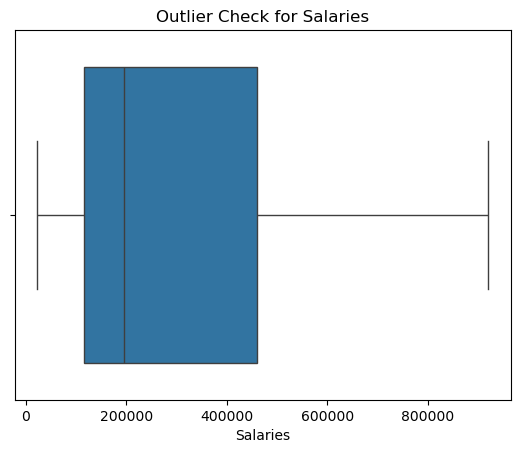

In [30]:
sns.boxplot(x=df['Salaries'])
plt.title("Outlier Check for Salaries")
plt.show()

## Getting Columns

In [31]:
df.columns

Index(['Company Name', 'Rating', 'Reviews', 'Salaries', 'Interviews', 'Jobs',
       'Industry', 'Primary_City', 'Num_Other_Locations'],
      dtype='object')

## Chicking For Unique values

In [32]:
df.nunique()

Company Name           20
Rating                  7
Reviews                20
Salaries               19
Interviews             17
Jobs                   20
Industry                6
Primary_City            5
Num_Other_Locations    20
dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Name         1980 non-null   object 
 1   Rating               1980 non-null   float64
 2   Reviews              1980 non-null   float64
 3   Salaries             1980 non-null   float64
 4   Interviews           1980 non-null   float64
 5   Jobs                 1980 non-null   float64
 6   Industry             1980 non-null   object 
 7   Primary_City         1980 non-null   object 
 8   Num_Other_Locations  1980 non-null   int32  
dtypes: float64(5), int32(1), object(3)
memory usage: 131.6+ KB


In [34]:
data.to_csv('ambition_box_data.csv', index=False)
print("Data successfully saved to 'ambition_box_data.csv'")

Data successfully saved to 'ambition_box_data.csv'


##  Statistical summary

In [35]:
df.describe()

,Rating,Reviews,Salaries,Interviews,Jobs,Num_Other_Locations
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,3.815000,40115.000000,282700.000000,4129.200000,1547.450000,534.100000
std,0.263268,17807.117206,230545.416426,2640.826076,2778.313904,532.459932
min,3.500000,22800.000000,22900.000000,784.000000,36.000000,45.000000
25%,3.700000,27000.000000,115000.000000,2150.000000,173.750000,173.000000
50%,3.700000,37150.000000,195000.000000,3200.000000,399.000000,236.500000
75%,3.925000,44425.000000,460000.000000,5525.000000,1850.000000,649.250000
max,4.700000,98700.000000,920000.000000,11100.000000,12400.000000,1709.000000


## Converting Datatypes To Sutable Datatypes

In [36]:
df['Industry']=df['Industry'].astype('category')
df['Primary_City']=df['Primary_City'].astype('category')

In [37]:
df['Jobs']=df['Jobs'].astype('float32')
df['Interviews']=df['Interviews'].astype('float32')
df['Salaries']=df['Salaries'].astype('float32')
df['Reviews']=df['Reviews'].astype('float32')
df['Num_Other_Locations']=df['Num_Other_Locations'].astype('int16')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Company Name         1980 non-null   object  
 1   Rating               1980 non-null   float64 
 2   Reviews              1980 non-null   float32 
 3   Salaries             1980 non-null   float32 
 4   Interviews           1980 non-null   float32 
 5   Jobs                 1980 non-null   float32 
 6   Industry             1980 non-null   category
 7   Primary_City         1980 non-null   category
 8   Num_Other_Locations  1980 non-null   int16   
dtypes: category(2), float32(4), float64(1), int16(1), object(1)
memory usage: 70.2+ KB


## Dealing with Null Values

In [39]:
df.isna().sum()[df.isna().sum() > 0]


Series([], dtype: int64)

In [40]:
df[df['Jobs'].isna()]

,Company Name,Rating,Reviews,Salaries,Interviews,Jobs,Industry,Primary_City,Num_Other_Locations


In [41]:
df['Jobs'].fillna(0, inplace=True) 

C:\Users\SUJITH\AppData\Local\Temp\ipykernel_5168\2021146789.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Jobs'].fillna(0, inplace=True)


In [42]:
df.isnull().sum()

Company Name           0
Rating                 0
Reviews                0
Salaries               0
Interviews             0
Jobs                   0
Industry               0
Primary_City           0
Num_Other_Locations    0
dtype: int64

##  Univariate Analysis

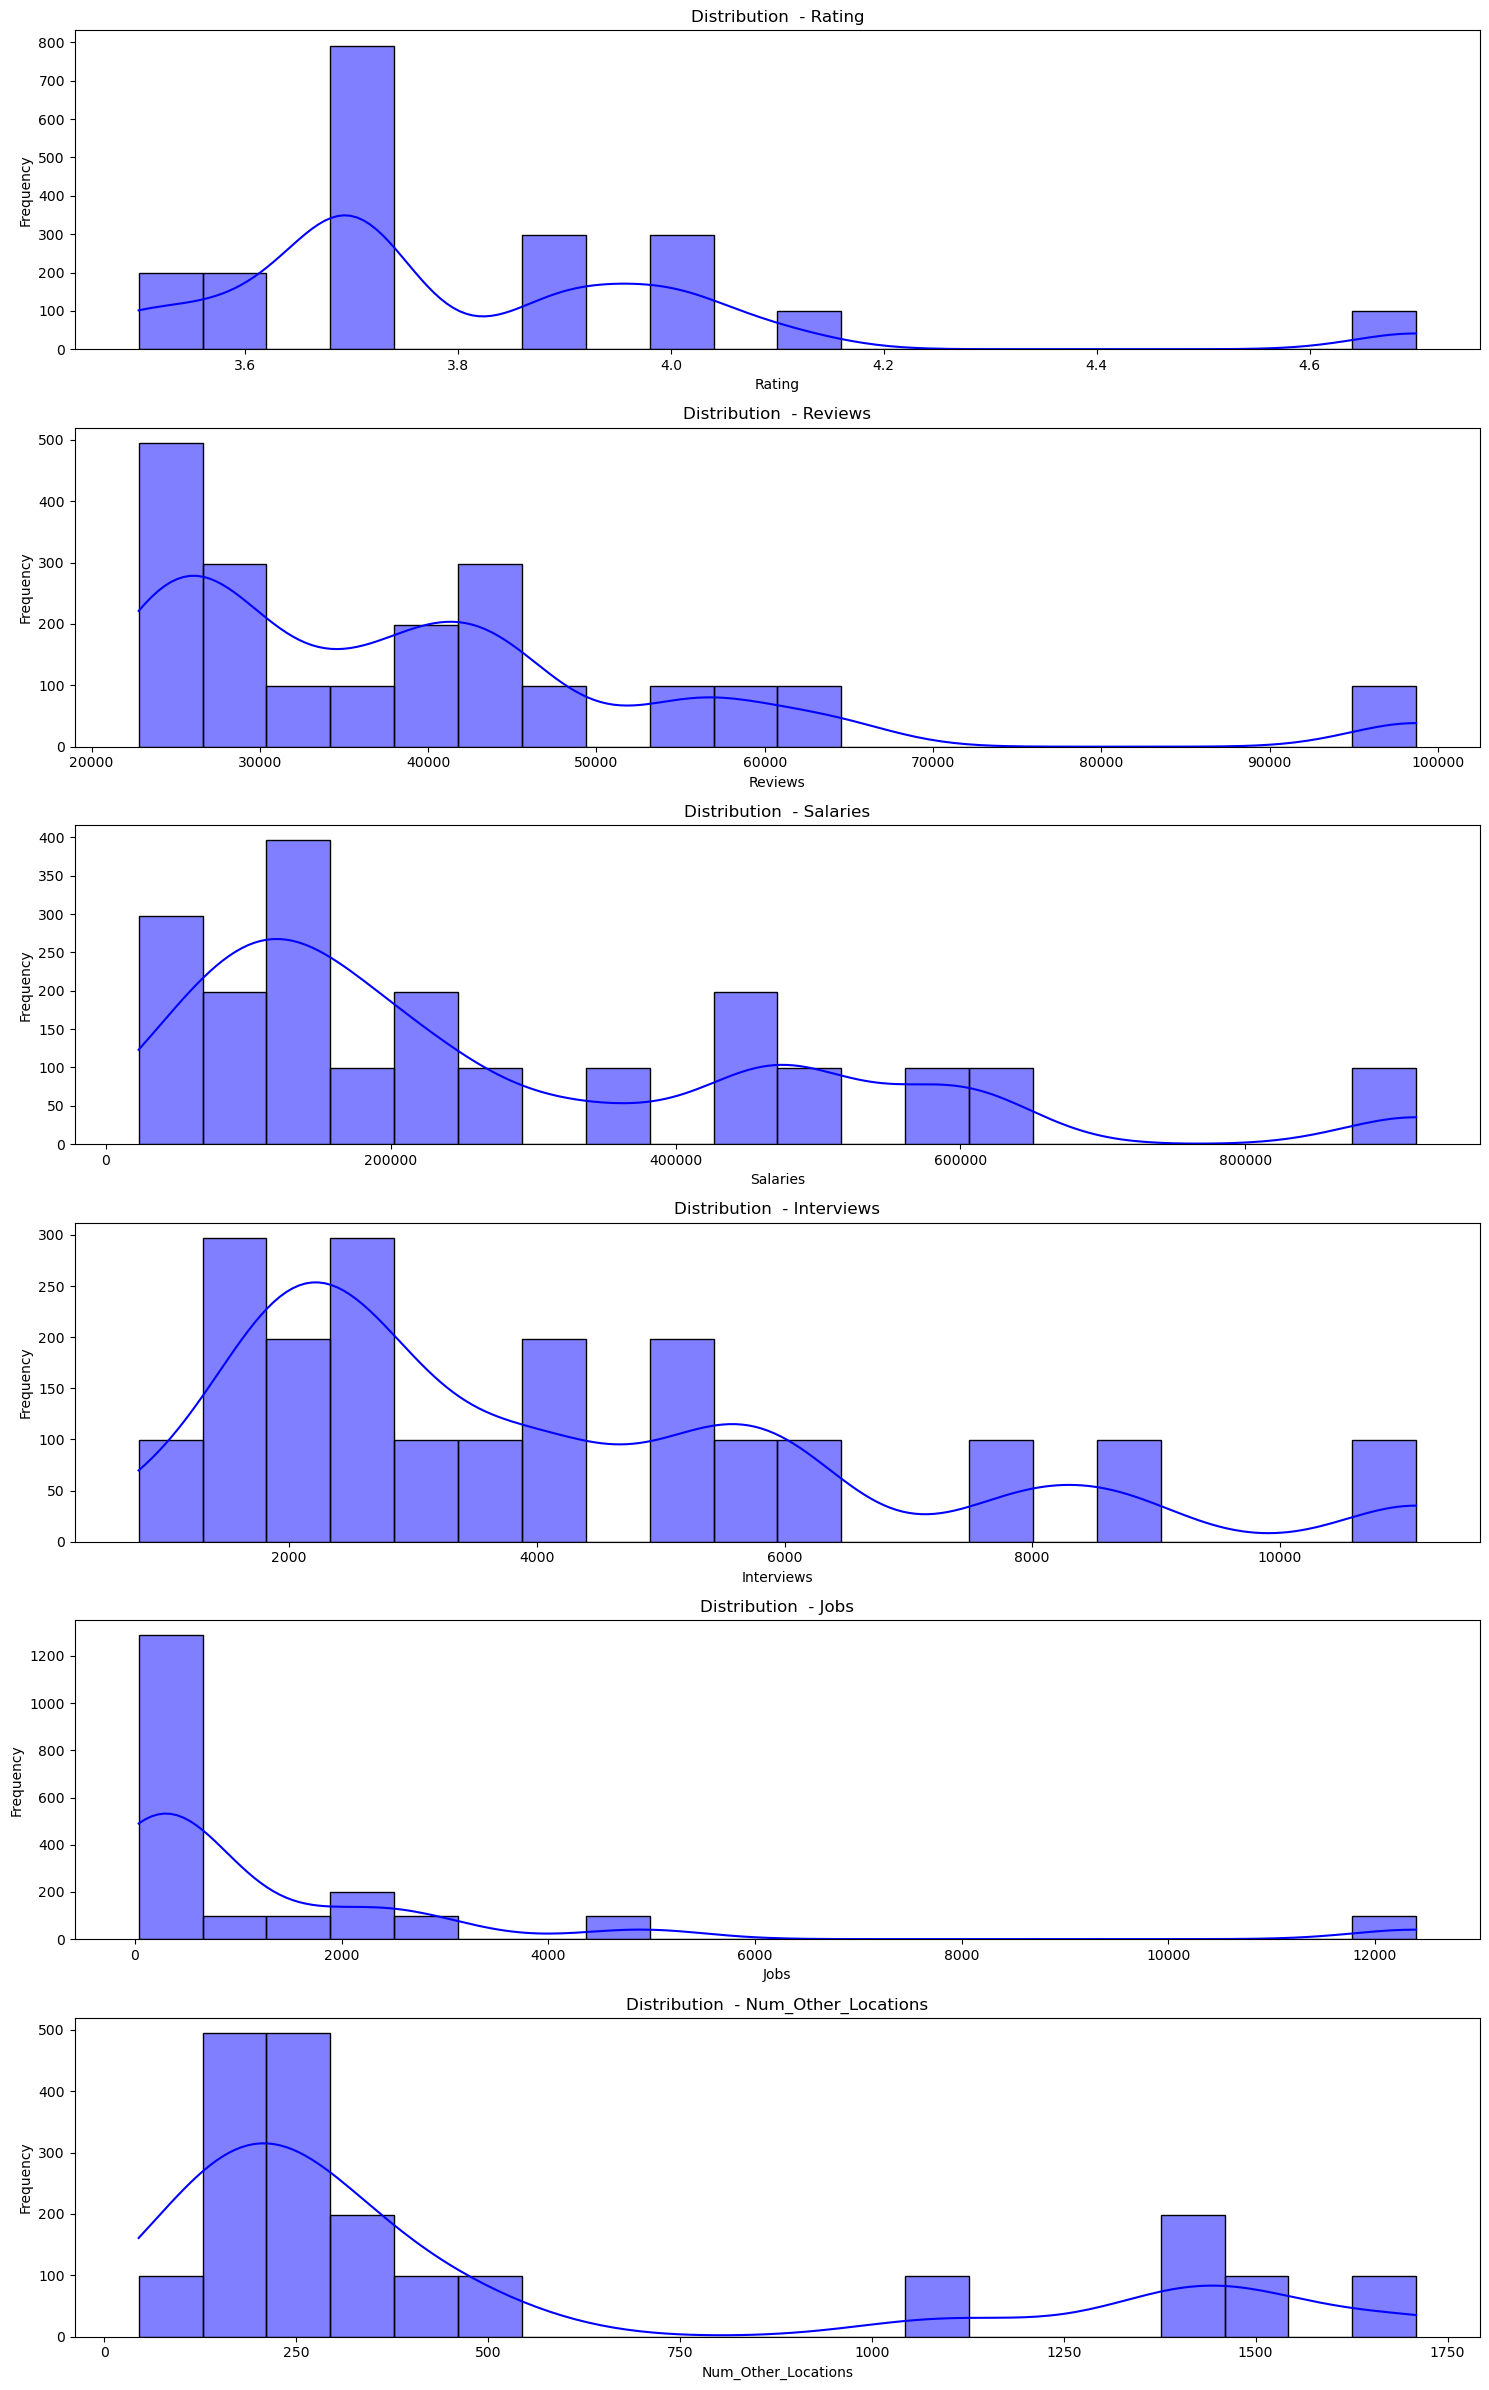

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Plot each numerical column with histogram + KDE
plt.figure(figsize=(15, 4 * len(num_cols)))

for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 1, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution  - {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Observation**

* 1.**Distribution with KDE - Rating**
  * Most rating fall between **3.6 to 4.1**, with a sigificant peak around **3.7-3.8**.

  * very few ratings go abouve **4.3**, indicating ratings are generally modrate.
 
* 2.**Distribution with KDE-Reviews**
  * Majority of companies having around **20,000 to 50,000 reviews**

  * There are few outlieres above **90,000 reviews**

* 3.**Distribution with KDE - Salaries**
  * Most salaries cluster between **50,000 to 300,000**,with several smaller peaks.
    
  * some outliers exist abouve **800,000**, indicating **high salary extremes** for a few roles.

* 4.**Distribution with KDE-Interviews**
  * interviews are mostly in the **1,000 to 6,000** range.
    
  * few companies have 10,000+ interviews, indicating outliers.

* 5.**Distribution with KDE-Jobs**
  * Most companies have less than **2,000 job posting**, with a sharp peak.
    
  * A few outliers go beyond 10,000 jobs,indicating **dominant hiring companies.
    
* 6.**Distribution with KDE-num_other_location**
  * Many companies have fewer than **500 other location**
    
  * A small number having over 1500,showing outliers with large presence.
  

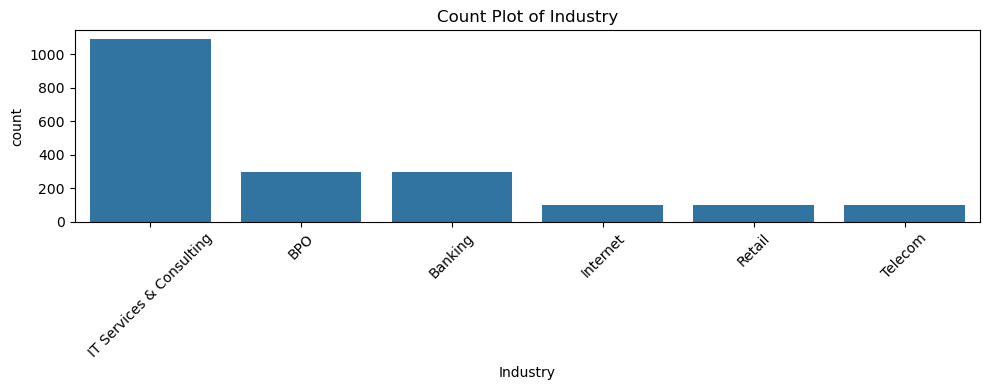

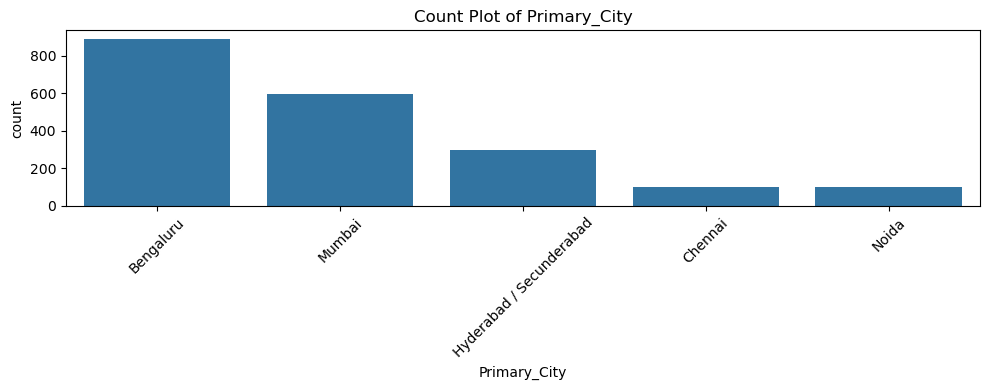

In [44]:
cat_cols = df.select_dtypes('category').columns

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()
    plt.show()

**Observation**

* 1. **Count plot of industry**
  * **IT servies & consulting** dominates with the highest count , indicating its the most represented industry in the dataset.
    
  * **BPO & Banking** come next , but with significantly fewer entries.

* 2. **Count plot of primary city**
  * **Bengaluru** leads with the highest number of records , followed by **mumbai** and **hyderabad/secunderabad**
    
  * **Chennai & Noida** have the lowest counts in this set.

## Bivariate Analysis


#### heatmap to find the Correlation

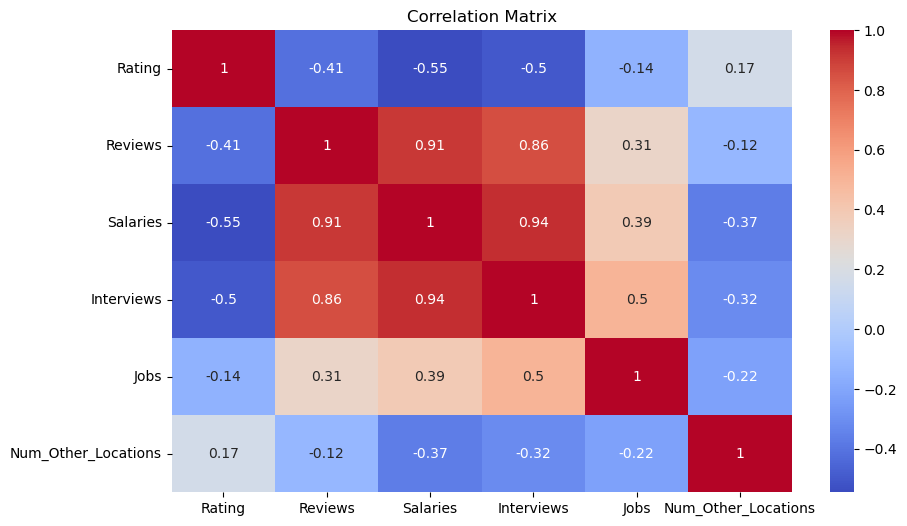

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Observations on the correlation matrix**:

* 1. **Strong postive correlations**:
     
  * Salaries & Interviews: correlation = 0.93,
    Most interviews are associated with higher salary data.

  * salaries & Reviews : correlation = 0.91
    Companies with more reviews tend to report higher salaries.
 
  * Interviews & Reviews: correlation = 0.86
    companies with more reviews also have more interviews data.
 
  * salaries & jobs: correlation = 0.39
    moderate positive relationship:more jobs might relate to higher salary data.
 
* 2. **Negative Correlation**:

  * Rating & Salaries: correlation = -0.54
    surprisingly, companies with higher salariestend to lower ratings

  * Rating & Interviews: correlation = -0.50
    companies with more interviews data often receive lower ratings.
 
* 3. **Weak Or Negligible Correlation**:
 
  * Rating & Jobs: correlations = -0.14

  * num_other_location has weak or negartives with most features.

## Top 10 Companies by Reviews

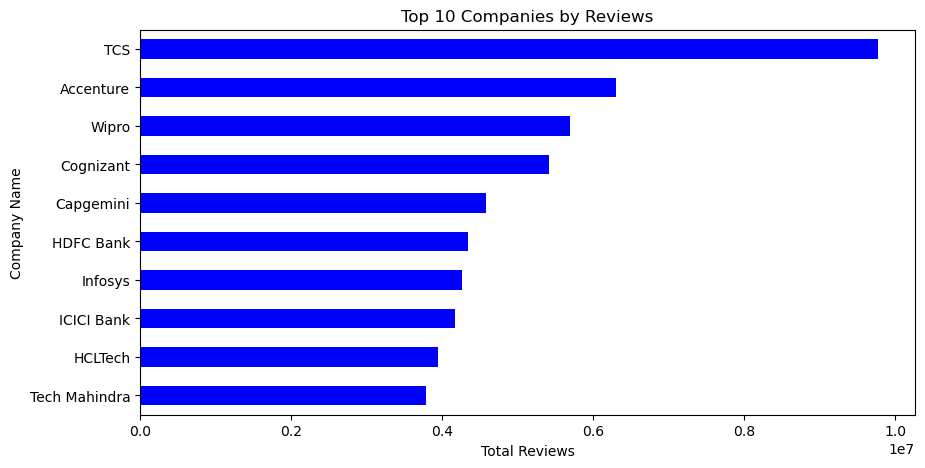

In [47]:
top_reviews = df.groupby('Company Name')['Reviews'].sum().sort_values(ascending=False).head(10)
top_reviews.plot(kind='barh', figsize=(10, 5), color='Blue')
plt.title("Top 10 Companies by Reviews")
plt.xlabel("Total Reviews")
plt.gca().invert_yaxis()
plt.show()

**Observation on Top 10 Companies by Reviews**

* 1. **TCS** ,**Accenture**, **Wipro**, **Cognizant**, **HDFC Bank** , **ICICI Bank** , **Infosys** ,**HCL TEch** , **Tech Mahindra**.
  * TCS has hidghest number of reviews, indicating a large employee base or active particpating in review platforms.
 
  * Accenture,wipro & Cogniznat follow in terms of reivews count, showing high engagement.
 
  * The list includes both IT companies like Infosys,HCL Tech ,Tech mahindra & Banks are HDFC Bank , ICICI Bank suggesting that job reviews are widespread across industries.
 

 
    

## Top companies with number of jobs 

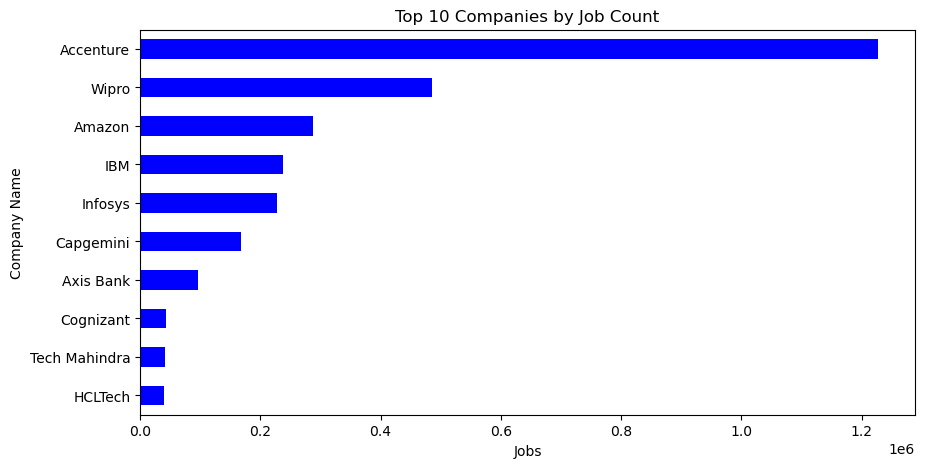

In [54]:
top_jobs = df.groupby('Company Name')['Jobs'].sum().sort_values(ascending=False).head(10)
top_jobs.plot(kind='barh', figsize=(10,5), color='Blue')
plt.title("Top 10 Companies by Job Count")
plt.xlabel("Jobs")
plt.gca().invert_yaxis()
plt.show()

**Observation on Top 10 Companies by jobs**
* 1. **Accenture** , **Wipro**, **Amazon**, **IBM** , **Infosys** , **Capgemini** , **AXIS Bank** , **Cognizant** , **Tech Mahindra** , **HCL Tech**.
  * Accenture leads by large margin with over 1.2millions job posting it indicating strong demand.
    
  * Wipro comes next, followed by Amazon and IBM , showing active recruitment in both IT services.
 
  * Other companies with notable job postings including Infosys, Capgemini & AXIS Bank showing that both IT and banking sectors are acitve.
 
  * Cognizant , Tech Mahindra & HCL Tech also made it to the top 10, though with relatively fewer jobs.

## Industry with Highest Average Salary

C:\Users\SUJITH\AppData\Local\Temp\ipykernel_5168\4191725121.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  industry_salary = df.groupby('Industry')['Salaries'].mean().sort_values(ascending=False).head(10)


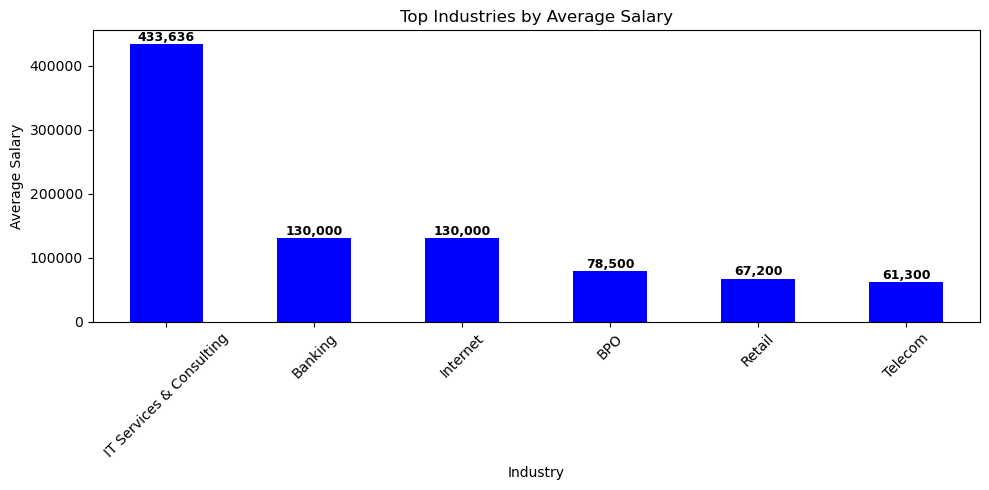

In [52]:

industry_salary = df.groupby('Industry')['Salaries'].mean().sort_values(ascending=False).head(10)
a=industry_salary.plot(kind='bar', figsize=(10,5), color='blue')
plt.title("Top Industries by Average Salary")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)

for i, v in enumerate(industry_salary):
    a.text(i, v + 1000, f"{v:,.0f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()



**Observation on Top Industries by Average Salary**
* 1. **IT Services & Consulting leads**
  * This industry has the highest average salary by a subsatainal margin of 433,636.
 
  * **Banking and Internet industries follows**
     * These two are industries show the next highest average salaries , both falling in the range of 130,000.
   
     * much lower than IT Services & consulting
   
  * **BPO , Retail & Telecom**
    * have Lower averages salaries
   
    * These industries show significantly lower average salaries, all below 100,000 units.
   
    * With Telecom having lowest among the displayed industries.

## Total Job Openings by Primary City

C:\Users\SUJITH\AppData\Local\Temp\ipykernel_5168\2805964850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jobs_by_city = df.groupby('Primary_City')['Jobs'].sum().sort_values(ascending=False)


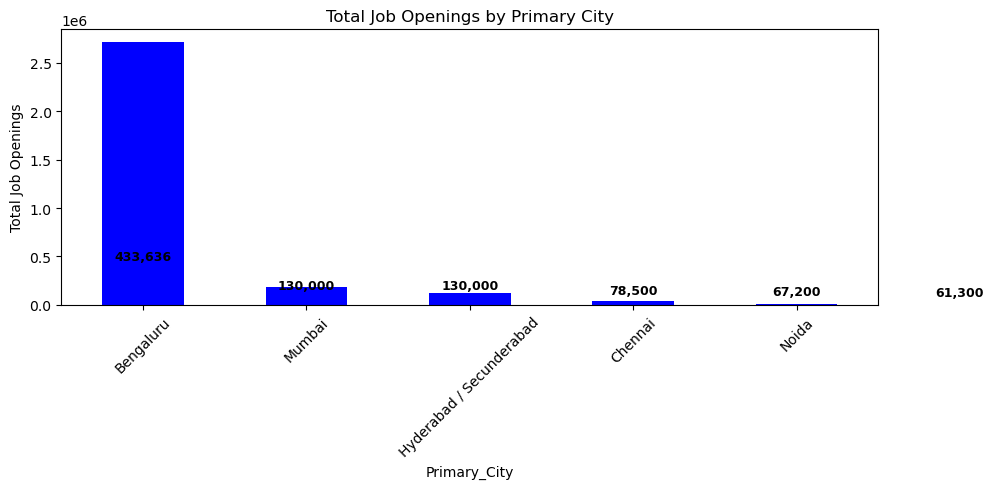

In [55]:
jobs_by_city = df.groupby('Primary_City')['Jobs'].sum().sort_values(ascending=False)
jobs_by_city
a=jobs_by_city.plot(kind='bar', figsize=(10,5), color='blue')
plt.title("Total Job Openings by Primary City")
plt.ylabel("Total Job Openings")
plt.xticks(rotation=45)
for i, v in enumerate(industry_salary):
    a.text(i, v + 1000, f"{v:,.0f}", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


**Observation on Total Job Openings by Primary City**
* **Bengaluru domainates job opening**
  * bengaluru has a significantly higher number of job openings comapred to all other cities,
    
  * with its bar reaching approximately 2.75 millions opening.

* **Mumbai & Hyderabad**
  * Mumbai and hyderabad show the next highest number of jobs opening,
    
  * but they are dramtically lower than bengaluru appering 130000.
 
* **Cheenai & Noida**
  * There's a very clearly chennai and noida are lowest job opening , even have a fewer job openings compared to mumbai

### ✅ Conclusion

This analysis of the AmbitionBox dataset offered a comprehensive view of **job availability**, **salary trends**, and **industry dynamics** across major Indian cities.

-  Cities like **Bengaluru**, **Mumbai**, and **Hyderabad** continue to lead India's employment landscape, especially in the **technology and services** sectors.

-  The data revealed **significant disparities in average salaries** across industries, helping identify **high-paying sectors** and potential career opportunities.

-  By combining data on **location**, **job roles**, and **industry sectors**, the analysis uncovered meaningful patterns useful for **career planning** and **recruitment strategies**.

-  The project underscores the power of **exploratory data analysis (EDA)** in deriving actionable insights from real-world employment data.

